<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/levelup.png' width=240/></center>

<center>모델을 빨리 만드는 것이 목적이 아닙니다. 천천히 생각하고 정리하면서 구문을 정성껏 작성하세요.</center>

# 과제: 직원 이직 여부 예측


<img src = "https://github.com/Jangrae/img/blob/master/employee.png?raw=true" width=900 align="left"/>

# 실습 안내

**1) 실습 방법**

- 데이터 전처리와 탐색 보다는 모델 코딩에 중점을 둡니다.
- 기존 소스에서 복사해 붙여넣기 하지 않고 다시 코딩합니다.
- 실습 후 시간이 남으면 데이터 탐색과 성능 튜닝을 진행합니다. 
- 모든 작업에는 주석을 가능한 충분히 답니다.
- 입력을 요구한 **(작성)**, **(의견)** 부분을 충분히 채웁니다.

**2) 실습 내용**

- 대상 데이터를 읽어와 탐색하며 이해합니다.
- 결측치를 확인하고 처리합니다.
- 범주형 변수를 구분하고 가변수화를 진행합니다.
- 연속형 변수를 구분하고 정규화를 진행합니다.
- 데이터를 학습용 데이터와 평가용 데이터로 분리합니다.
- 다양한 머신러닝 알고리즘을 사용해 모델링합니다.
- 데이터 불균형을 해결하고 다시 모델링해 이전 성능과 비교합니다.
- 성능 평가 결과를 이해하고 설명합니다.

**3) 데이터 정보**

- Attrition: 이직여부 (1-Yes 0-No)	
- Age: 나이	
- BusinessTravel: 출장 빈도
- Department: 현재 부서	
- DistanceFromHome: 집과 직장 사이의 거리 (마일)	
- Education: 교육수준 (1-Below College 2-College 3-Bachelor 4- Master 5-Doctor)
- EducationField: 전공	
- EmployeeNumber: 사번	
- EnvironmentSatisfaction: 근무환경에 대한 만족도 (1-Low 2-Good 3-Excellent 4-Outstanding)
- Gender: 성별	
- JobInvolvement: 직무 적극성, 참여도 (1-Low 2-Medium 3-High 4-Very High)
- JobRole: 직무	
- JobSatisfaction: 직무 만족도 (1-Low 2-Medium 3-High 4-Very High)
- MaritalStatus: 결혼상태	
- MonthlyIncome: 월급	
- NumCompaniesWorked: 현재까지 근무한 회사 수	
- OverTime: 야근 여부	
- PercentSalaryHike: 전년대비 급여 인상율 (%)	
- RelationshipSatisfaction: 동료와의 관계 만족도 (1-Low 2-Medium 3-High 4-Very High)
- StockOptionLevel: 스톡옵션 수준 (0 ~ 3)	
- TotalWorkingYears: 총 근무 연수	
- TrainingTimesLastYear: 전년 교육훈련 횟수	
- WorkLifeBalance: 워라밸, 일과 삶의 균형도 (1-Bad 2-Good 3-Better 4-Best)
- YearsAtCompany: 현 직장 근무 연수	
- YearsInCurrentRole: 현 직무 연수	
- YearsWithCurrManager: 현 팀장과 근무한 연수

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [215]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [216]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Attrition_NA.CSV'
path = 'https://bit.ly/AttritionFile'
data = pd.read_csv(path)

# 값 변경: Yes/No --> 1/0
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# 2.데이터 탐색

- 다양한 탐색 및 분석 방법을 사용해 대상 데이터를 충분히 이해합니다.

**1) 상/하위 데이터 확인**

- 데이터 앞/뒤를 살펴 데이터를 간단히 확인합니다.

In [217]:
# 상위 데이터 확인
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,0,33,Travel_Rarely,Research & Development,7.0,3,Medical,817,3,Male,...,No,11,4,0,14,3,4,13,9,7
1,0,35,Travel_Frequently,Research & Development,18.0,2,Life Sciences,1412,3,Male,...,No,11,3,0,10,2,3,2,2,2
2,0,42,Travel_Rarely,Research & Development,6.0,3,Medical,1911,3,Male,...,No,13,2,1,18,3,4,13,7,7
3,0,46,Travel_Rarely,Sales,2.0,3,Marketing,1204,3,Female,...,No,23,1,0,28,2,3,26,15,9
4,0,39,Travel_Frequently,Sales,NaN,3,Life Sciences,1812,3,Male,...,No,18,4,1,7,6,3,2,1,2


In [218]:
# 하위 데이터 확인
data.tail()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
1245,0,27,Travel_Rarely,Research & Development,19.0,3,Other,1619,4,Male,...,No,11,1,2,7,3,3,7,7,7
1246,0,29,Travel_Rarely,Research & Development,9.0,3,Life Sciences,1558,3,Male,...,No,18,1,2,5,2,2,1,0,0
1247,0,29,Non-Travel,Sales,2.0,3,Life Sciences,469,4,Male,...,No,14,1,1,4,3,2,4,3,2
1248,0,43,Travel_Rarely,Sales,16.0,3,Marketing,327,4,Female,...,Yes,22,3,1,22,3,3,17,13,9
1249,0,26,Travel_Rarely,Research & Development,NaN,4,Medical,1177,1,Male,...,No,22,2,1,8,2,3,8,7,7


**2) 변수 정보 확인**

- 변수 이름, 값 개수, 데이터 형식등을 확인합니다.

In [219]:
# 열 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1250 non-null   int64  
 1   Age                       1250 non-null   int64  
 2   BusinessTravel            1250 non-null   object 
 3   Department                1250 non-null   object 
 4   DistanceFromHome          1196 non-null   float64
 5   Education                 1250 non-null   int64  
 6   EducationField            1250 non-null   object 
 7   EmployeeNumber            1250 non-null   int64  
 8   EnvironmentSatisfaction   1250 non-null   int64  
 9   Gender                    1250 non-null   object 
 10  JobInvolvement            1250 non-null   int64  
 11  JobRole                   1250 non-null   object 
 12  JobSatisfaction           1250 non-null   int64  
 13  MaritalStatus             1250 non-null   object 
 14  MonthlyI

**3) 기초통계정보 확인**

- 기초통계정보를 통해 숫자 데이터를 갖는 변수들 값 분포를 확인합니다.

In [220]:
# 기초 통계 정보
data.describe()

,Attrition,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
count,1250.000000,1250.000000,1196.000000,1250.000000,1250.00000,1250.000000,1250.0000,1250.000000,1250.000000,1229.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,0.160000,36.931200,9.258361,2.916800,1030.97120,2.739200,2.7272,2.729600,6525.548000,2.678600,15.216000,2.717600,0.796000,11.33920,2.808000,2.761600,7.117600,4.276000,4.166400
std,0.366753,9.122162,8.166016,1.025436,603.40408,1.096971,0.7102,1.110617,4676.979554,2.473647,3.625556,1.074977,0.851213,7.79687,1.277357,0.715245,6.246966,3.660074,3.610476
min,0.000000,18.000000,1.000000,1.000000,1.00000,1.000000,1.0000,1.000000,1009.000000,0.000000,11.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,2.000000,2.000000,496.25000,2.000000,2.0000,2.000000,2932.250000,1.000000,12.000000,2.000000,0.000000,6.00000,2.000000,2.000000,3.000000,2.000000,2.000000
50%,0.000000,36.000000,7.000000,3.000000,1028.00000,3.000000,3.0000,3.000000,4988.000000,2.000000,14.000000,3.000000,1.000000,10.00000,3.000000,3.000000,5.000000,3.000000,3.000000
75%,0.000000,43.000000,14.000000,4.000000,1567.00000,4.000000,3.0000,4.000000,8437.500000,4.000000,18.000000,4.000000,1.000000,15.00000,3.000000,3.000000,10.000000,7.000000,7.000000
max,1.000000,60.000000,29.000000,5.000000,2068.00000,4.000000,4.0000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.00000,6.000000,4.000000,40.000000,18.000000,17.000000


**4) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [221]:
# 결측치 확인
data.isna().sum()

Attrition                    0
Age                          0
BusinessTravel               0
Department                   0
DistanceFromHome            54
Education                    0
EducationField               0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
JobInvolvement               0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsWithCurrManager         0
dtype: int64

**5) Attrition 변수 분포 확인**

- Target 변수인 Attrition 값 분포를 확인합니다.

In [222]:
# 번주값과 그 값의 개수 확인
data['Attrition'].value_counts()

0    1050
1     200
Name: Attrition, dtype: int64

**참고**

- 0과 1의 분포가 너무 차이가 나며, 이러한 데이터를 불균형 데이터라고 부릅니다.
- 우선 불균형 데이터로 모델링을 진행합니다.

**6) 주요 변수 확인**

6-1) Attrition 변수 값 분포를 막대그래프로 시각화해 확인합니다.

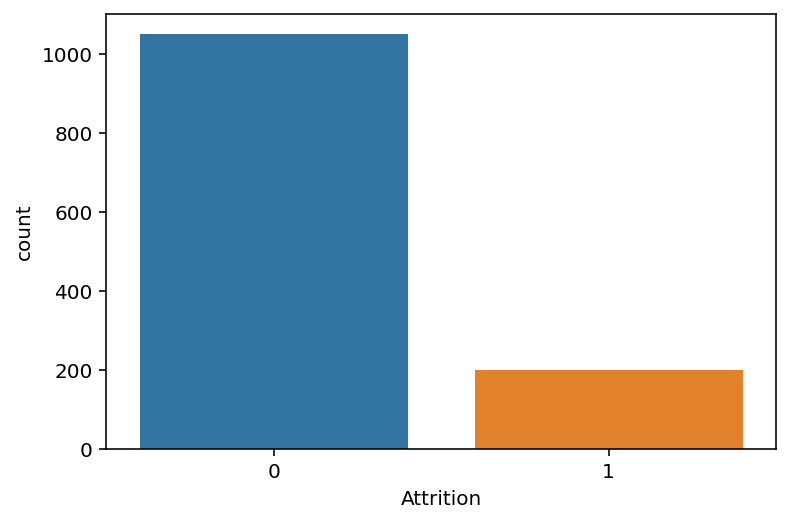

In [223]:
# Attrition 값 분포
sns.countplot(x=data['Attrition'])
plt.show()

- 0과 1 의 데이터 불균형을 볼 수 있다.
- 이직한 직원의 데이터를 분석하여 공통적인 원인을 파악해본다.

6-2) Attrition 값으로 구분해 Age 변수 값 분포를 히스토그램으로 시각화해 확인합니다.

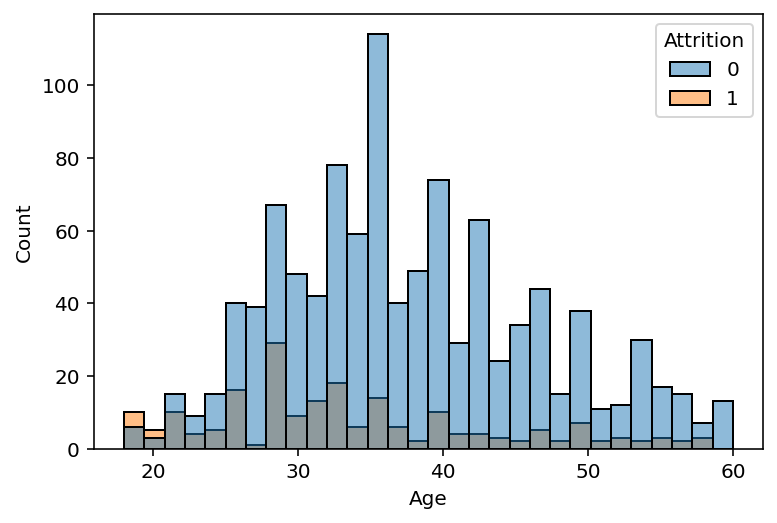

In [224]:
# Age --> Attrition 값 분포
sns.histplot(x=data['Age'], hue=data['Attrition'], bins=30)
plt.show()

- 20-30 나이대에서 이직을 많이 하는 것으로 보인다.
- -> 경력을 어느 정도 채우고 
- 잔류 나이대는 30-40대가 많은 정규분포 형태로 나타난다.


6-3) Attrition 값으로 구분해 YearsAtCompany 변수 값 분포를 히스토그램으로 시각화해 확인합니다.

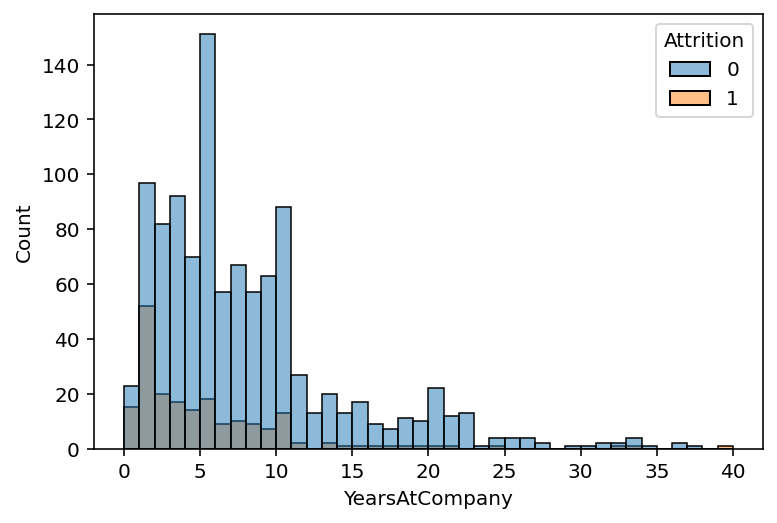

In [225]:
# YearsAtCompany --> Attrition 값 분포
sns.histplot(x=data['YearsAtCompany'], hue=data['Attrition'], bins=40)
plt.show()

- 이직을 한 사람 중 1년 이하로 근무를 했다면 취준을 하는 과정에서 취업을 했지만 자신이 원했던 회사로 재취업을 했을 것이다.
- 2-3년 이상의 이직을 한 사람의 경우 경력을 어느정도 채웠기 때문에 자신의 경력을 더 인정해주는 회사 또는 본인 희망 회사로 이직했을 것이다

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 결측치 처리**

- 다음 두 변수의 결측치는 두 변수의 가장 빈번한 값으로 변경합니다.
    - DistanceFromHome, NumCompaniesWorked
- value_counts().idxmax()를 사용해 가장 빈도가 높은 변수 값을 얻을 수 있습니다.

In [226]:
# 결측치 처리
fre_DistanceFromHome = data['DistanceFromHome'].value_counts().idxmax()
fre_NumCompaniesWorked = data['NumCompaniesWorked'].value_counts().idxmax()
data['DistanceFromHome'].fillna(fre_DistanceFromHome, inplace=True)
data['NumCompaniesWorked'].fillna(fre_NumCompaniesWorked, inplace=True)

# 확인
data.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsWithCurrManager        0
dtype: int64

**2) x, y 분리**

- Attrition 변수가 Target입니다.
- x, y가 분리된 이후부터 y는 절대로 건드지지 않아야 합니다.

In [227]:
# target 확인
target = 'Attrition'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**3) 가변수화**

- 왜 x의 다음 변수들이 가변수화 대상이 되는지 파악한 후 가변수화를 진행합니다.
    - BusinessTravel, Department, Education, EducationField, EnvironmentSatisfaction, Gender
    - JobInvolvement, JobRole, JobSatisfaction, MaritalStatus, OverTime, RelationshipSatisfaction
    - StockOptionLevel, WorkLifeBalance

In [228]:
# 가변수화
cols = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 
        'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 
        'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']


# 확인
x = pd.get_dummies(x, columns=cols, drop_first=True)

In [229]:
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,0,33,Travel_Rarely,Research & Development,7.0,3,Medical,817,3,Male,...,No,11,4,0,14,3,4,13,9,7
1,0,35,Travel_Frequently,Research & Development,18.0,2,Life Sciences,1412,3,Male,...,No,11,3,0,10,2,3,2,2,2
2,0,42,Travel_Rarely,Research & Development,6.0,3,Medical,1911,3,Male,...,No,13,2,1,18,3,4,13,7,7
3,0,46,Travel_Rarely,Sales,2.0,3,Marketing,1204,3,Female,...,No,23,1,0,28,2,3,26,15,9
4,0,39,Travel_Frequently,Sales,2.0,3,Life Sciences,1812,3,Male,...,No,18,4,1,7,6,3,2,1,2


**4) 정규화**

- x의 다음 변수들을 정규화 합니다.
    - Age, DistanceFromHome, EmployeeNumber, MonthlyIncome,NumCompaniesWorked 
    - PercentSalaryHike, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany 
    - YearsInCurrentRole, YearsWithCurrManager

In [230]:
# 정규화
cols=['Age', 'DistanceFromHome', 'EmployeeNumber', 'MonthlyIncome', 'NumCompaniesWorked', 
      'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
      'YearsInCurrentRole', 'YearsWithCurrManager']


# 확인
x = (x[cols] - x[cols].min())/(x[cols].max()-x[cols].min())

**5) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 7:3으로 분리합니다.
- random_state 옵션 값은 2022를 지정합니다.

In [232]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링 1차

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 다양한 알고리즘으로 모델을 만들고 각각의 성능을 확인합니다.
- 성능 평가는 confusion_matrix, classification_report를 사용합니다.
- 각 알고리즘별로 요구되는 내용을 숙지하면서 모델링을 진행합니다.

## 4.1.KNN

### 4.1.1.모델링
- KNN 알고리즘으로 모델링하고 성능을 확인합니다.

In [233]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [234]:
# 2단계: 선언하기
model = KNeighborsClassifier()

In [235]:
# 3단계: 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [236]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [237]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[303  12]
 [ 50  10]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       315
           1       0.45      0.17      0.24        60

    accuracy                           0.83       375
   macro avg       0.66      0.56      0.58       375
weighted avg       0.79      0.83      0.80       375



### 4.1.2.성능 정보 수집

- 아래 구문을 수행하여 이후 비교할 성능 정보를 저장합니다.

In [238]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

score={}
score['KNN'] = [precision_score(y_test, y_pred),
                recall_score(y_test, y_pred),
                accuracy_score(y_test, y_pred)]

## 4.2.Logistic Regression

### 4.2.1.모델링

- Logistic Regression 알고리즘으로 모델링하고 성능을 확인합니다.

In [239]:
# 1단계: 불러오기
from sklearn.linear_model import LogisticRegression

In [240]:
# 2단계: 선언하기
model = LogisticRegression()

In [241]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LogisticRegression()

In [242]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [243]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[315   0]
 [ 60   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       315
           1       0.00      0.00      0.00        60

    accuracy                           0.84       375
   macro avg       0.42      0.50      0.46       375
weighted avg       0.71      0.84      0.77       375



### 4.2.2.성능 정보 수집

- 아래 구문을 수행하여 이후 비교할 성능 정보를 저장합니다.

In [244]:
score['Logistic Reg'] = [precision_score(y_test, y_pred),
                         recall_score(y_test, y_pred),
                         accuracy_score(y_test, y_pred)]

## 4.3.Random Forest

### 4.3.1.모델링

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [245]:
# 1단계: 불러오기
from sklearn.ensemble import RandomForestClassifier

In [246]:
# 2단계: 선언하기
model = RandomForestClassifier(random_state=2022)

In [247]:
# 3단계: 학습하기
model.fit(x_train, y_train)

RandomForestClassifier(random_state=2022)

In [248]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [249]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[309   6]
 [ 50  10]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       315
           1       0.62      0.17      0.26        60

    accuracy                           0.85       375
   macro avg       0.74      0.57      0.59       375
weighted avg       0.82      0.85      0.81       375



### 4.3.2.성능 정보 수집

- 아래 구문을 수행하여 이후 비교할 성능 정보를 저장합니다.

In [250]:
score['Random Forest'] = [precision_score(y_test, y_pred),
                          recall_score(y_test, y_pred),
                          accuracy_score(y_test, y_pred)]

### 4.3.3 Feature 중요도 시각화

In [251]:
# 중요도 확인
im = pd.DataFrame()
im['feature'] = list(x)
im['score'] = model.feature_importances_
im.sort_values(by='score', ascending=True, inplace=True)
im

,feature,score
9,YearsInCurrentRole,0.044764
10,YearsWithCurrManager,0.055227
7,TrainingTimesLastYear,0.056402
4,NumCompaniesWorked,0.066032
8,YearsAtCompany,0.082035
5,PercentSalaryHike,0.086532
6,TotalWorkingYears,0.095508
1,DistanceFromHome,0.109515
2,EmployeeNumber,0.127939
0,Age,0.128619


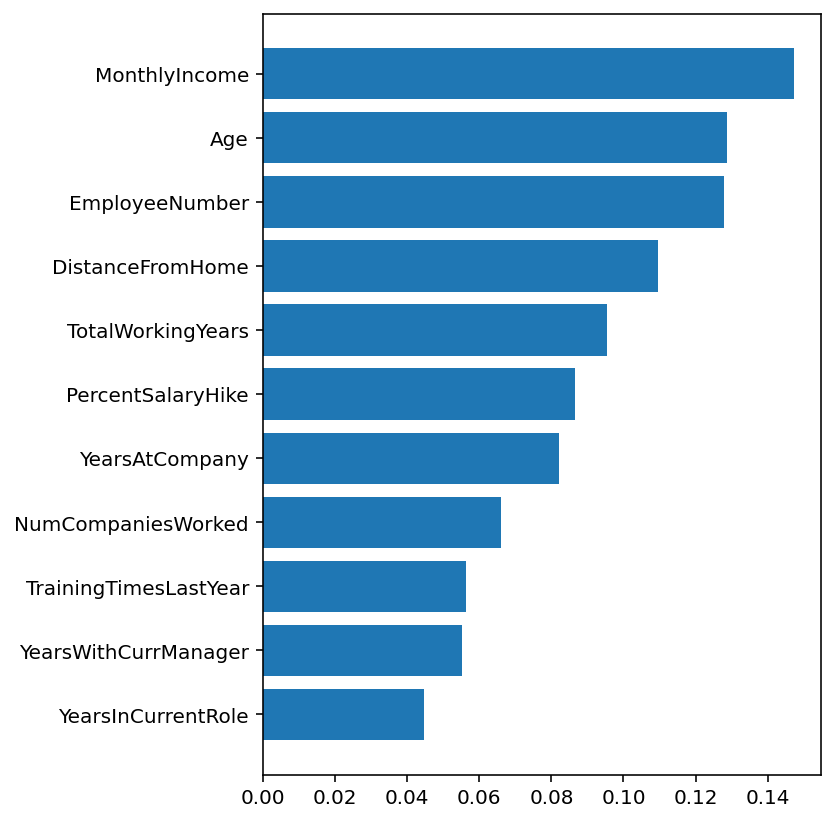

In [252]:
# 중요도 시각화
plt.figure(figsize=(5, 7))
plt.barh(im['feature'], im['score'])
plt.show()

- 경제활동의 주 이유 월급, 나이, 나이와 비슷한 사번, 집과 직장 거리 순으로 feature가 중요함을 나타낸다.

## 4.4.XGBoost

### 4.4.1.모델링

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022를 지정합니다.

In [253]:
# 1단계: 불러오기
from xgboost import XGBClassifier

In [254]:
# 2단계: 선언하기
model = XGBClassifier(random_state=2022)

In [255]:
# 3단계: 학습하기
model.fit(x_train, y_train)

[10:26:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2022,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [256]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [257]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[298  17]
 [ 48  12]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       315
           1       0.41      0.20      0.27        60

    accuracy                           0.83       375
   macro avg       0.64      0.57      0.59       375
weighted avg       0.79      0.83      0.80       375



### 4.4.2.성능 정보 수집

- 아래 구문을 수행하여 이후 비교할 성능 정보를 저장합니다.

In [258]:
score['XGBoost'] = [precision_score(y_test, y_pred),
                    recall_score(y_test, y_pred),
                    accuracy_score(y_test, y_pred)]

### 4.4.3. Feature 중요도 확인

In [259]:
# 중요도 확인
im = pd.DataFrame()
im['feature'] = list(x)
im['score'] = model.feature_importances_
im.sort_values(by='score', ascending=True, inplace=True)
im

,feature,score
9,YearsInCurrentRole,0.061542
0,Age,0.081704
2,EmployeeNumber,0.083468
3,MonthlyIncome,0.084338
5,PercentSalaryHike,0.084537
7,TrainingTimesLastYear,0.085208
10,YearsWithCurrManager,0.089376
1,DistanceFromHome,0.090180
8,YearsAtCompany,0.091394
4,NumCompaniesWorked,0.091534


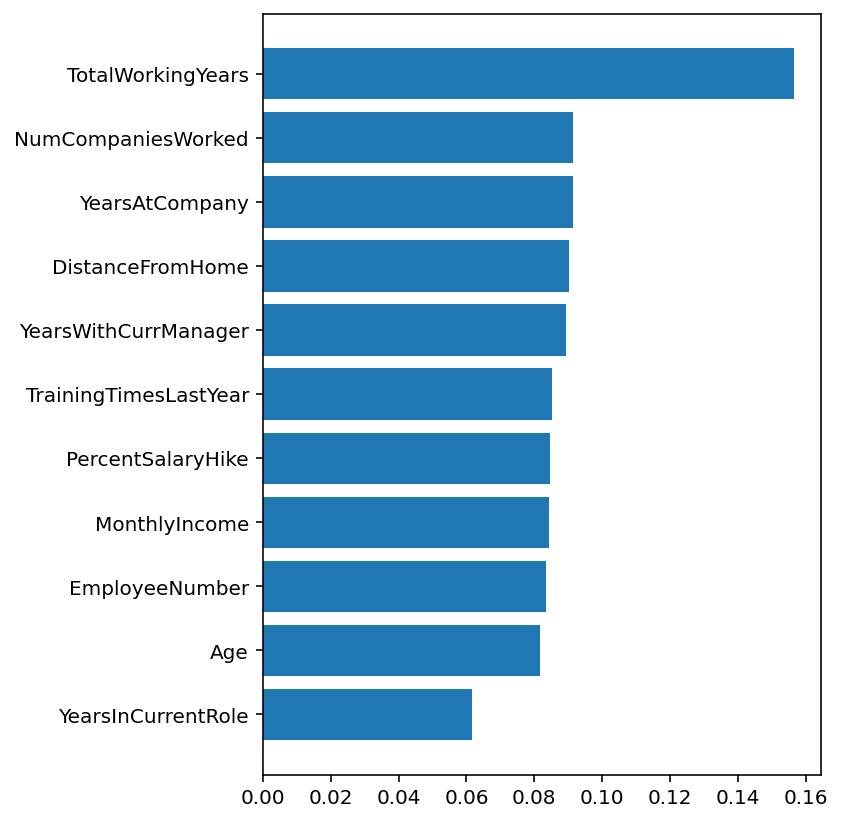

In [260]:
# 중요도 시각화
plt.figure(figsize=(5, 7))
plt.barh(im['feature'], im['score'])
plt.show()

- 랜덤포레스트와 다르게 XGBoost모델에서는 총 근무 연수가 가장 중요하다는 것을 알 수 있다.
- 랜덤포레스트에서 2~4위 안으로 들었던 월급, 나이, 사번은 이 모델에서 후순위에 있는 것을 볼 수 있다.
- 총 근무 연수를 제외한 나머지 feature는 거의 동일한 중요도를 나타낸다.

## 4.5 Decision Tree

### 4.4.1.모델링

In [261]:
# 1단계: 불러오기
from sklearn.tree import DecisionTreeClassifier

In [262]:
# 2단계: 선언하기
model = DecisionTreeClassifier(random_state=2022)

In [263]:
# 3단계: 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [264]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [265]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[270  45]
 [ 44  16]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       315
           1       0.26      0.27      0.26        60

    accuracy                           0.76       375
   macro avg       0.56      0.56      0.56       375
weighted avg       0.76      0.76      0.76       375



### 4.5.2.성능 정보 수집

In [266]:
score['Decision Tree'] = [precision_score(y_test, y_pred),
                    recall_score(y_test, y_pred),
                    accuracy_score(y_test, y_pred)]

### 4.5.3 Decision Tree 시각화

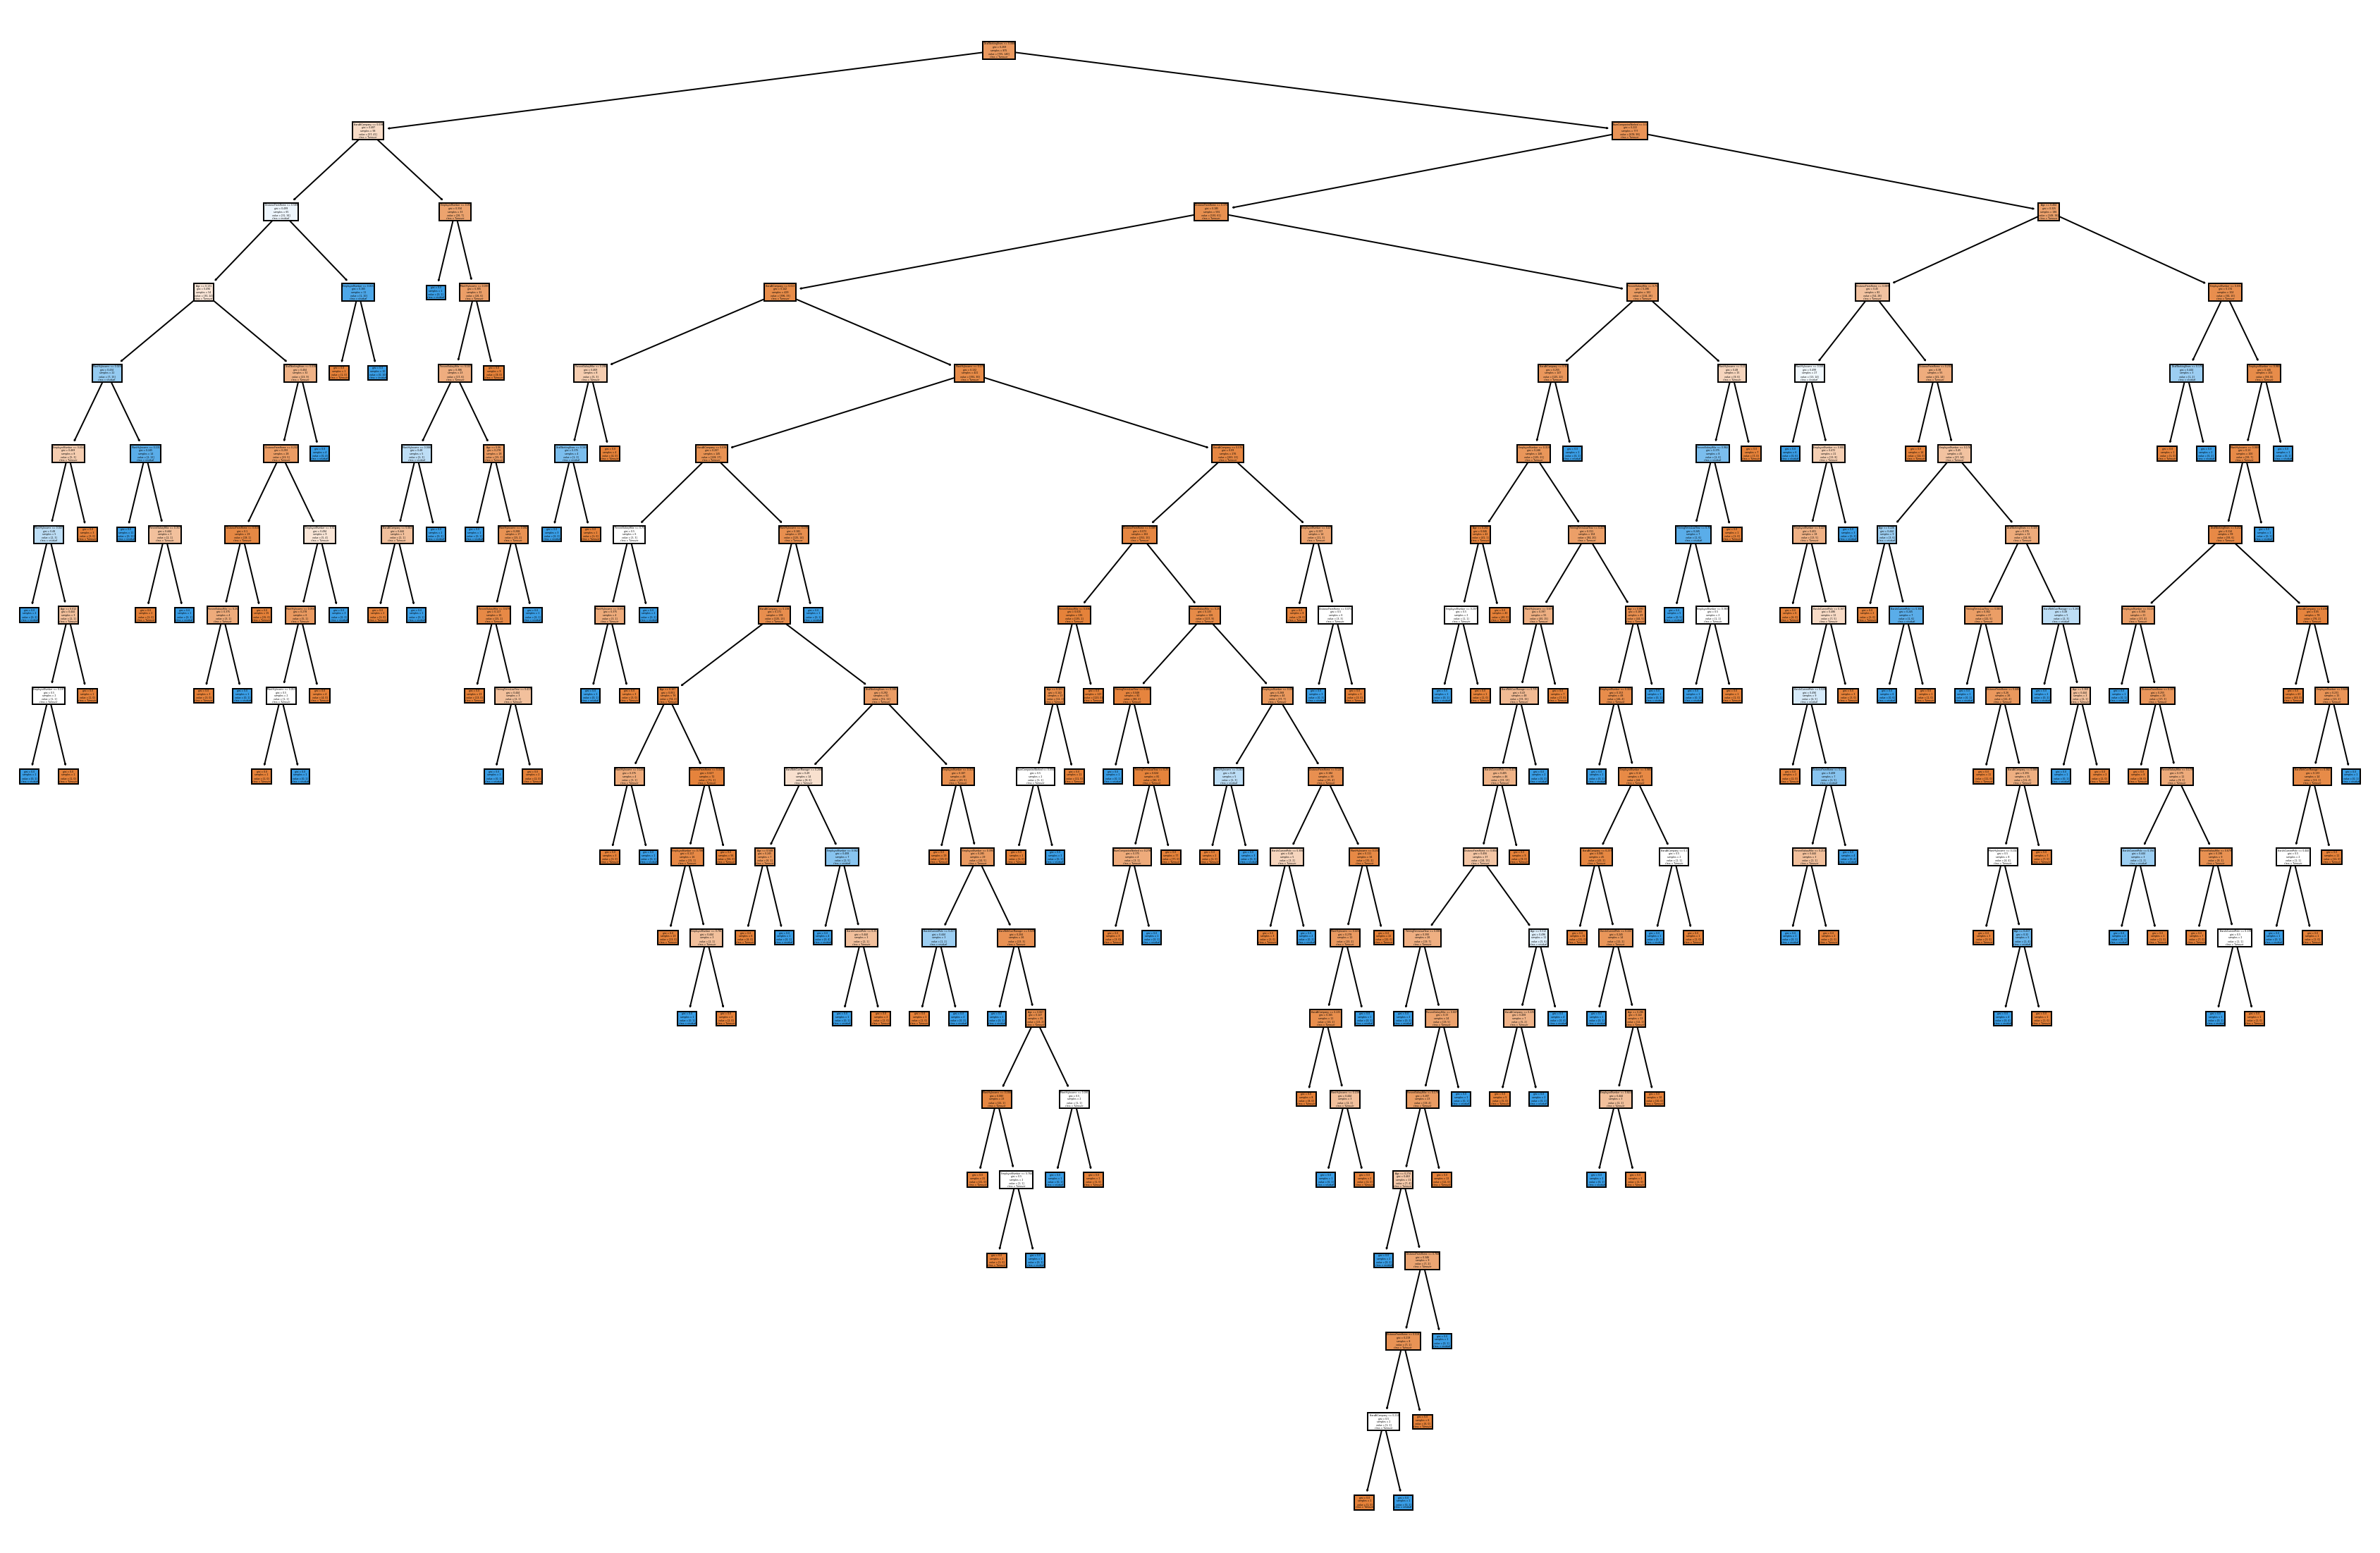

In [267]:
# 시각화 모듈 불러오기
from sklearn import tree

fig = plt.figure(figsize=(30, 20))
mytree = tree.plot_tree(model,
                        feature_names=x.columns,  
                        class_names=['Turnover', 'residual'], 
                        filled=True)

### 4.5.4 Feature 중요도 시각화

In [268]:
# 중요도 확인
im = pd.DataFrame()
im['feature'] = list(x)
im['score'] = model.feature_importances_
im.sort_values(by='score', ascending=True, inplace=True)
im

,feature,score
4,NumCompaniesWorked,0.022922
10,YearsWithCurrManager,0.033206
7,TrainingTimesLastYear,0.041042
9,YearsInCurrentRole,0.069984
5,PercentSalaryHike,0.081166
8,YearsAtCompany,0.088102
1,DistanceFromHome,0.103330
6,TotalWorkingYears,0.114467
0,Age,0.119742
3,MonthlyIncome,0.157617


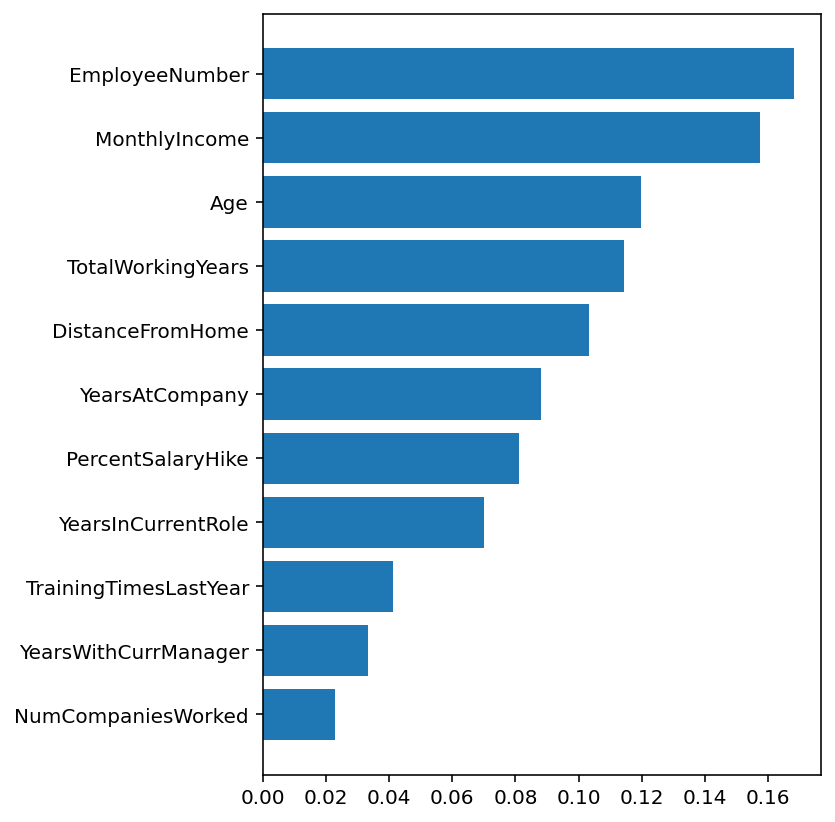

In [269]:
# 중요도 시각화
plt.figure(figsize=(5, 7))
plt.barh(im['feature'], im['score'])
plt.show()

# 5.정리 #1

- 모델 성능에서 특이한 점을 발견했나요?
- accuracy, precision이 높은 이유는 무엇일까요?
- racall이 낮는 이유는 무엇일까요?

- 1의 recall이 굉장히 낮게 나온 것을 확인할 수 있다.
- 가장 낮은 것은 0이 나왔다.
- -> 0과 1의 데이터 불균형 때문
- 0의 accuracy, precision은 높은 성능을 가지는데,
- 데이터의 수가 1에 비해 월등히 많기 때문

# 6. Over/Under Sampling

- 불균형 데이터(Imbalanced Data)를 맞추기 위해 Over 또는 Under Sampling을 수행할 수 있습니다.
- imblearn 라이브러리를 사용합니다.

In [270]:
# imbalanced-learn 라이브러리 설치
!pip install imblearn

- 원래 Target 값 분포를 우선 확인합니다.

In [271]:
# Target 값 분포 확인
y.value_counts()

0    1050
1     200
Name: Attrition, dtype: int64

- 본 실습에서는 Over Sampling으로 작업합니다.

In [272]:
# Over Sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2022)
x_over, y_over = smote.fit_resample(x, y)

- Over Sampling 된 y_over 분포를 확인하면 0과 1 값의 비율이 같음을 알 수 있습니다.

In [273]:
# Target 값 분포 확인
y_over.value_counts()

0    1050
1    1050
Name: Attrition, dtype: int64

- 참고: Under Sampling 방법은 아래와 같으며, 본 실습에서 사용하지 않으니 주석처리합니다.

In [274]:
# Under Sampling
# from imblearn.under_sampling import ClusterCentroids

# cc = ClusterCentroids(random_state=2022)
# x_under, y_under = cc.fit_resample(x, y)

- 새로 Sampling 된 데이터(x_over, y_over)로 학습용, 평가용 데이터를 7:3으로 분리합니다.
- random_state 옵션 값은 2022를 지정합니다.

In [275]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=2022)  

# 7.모델링 #2

- 위에서 만든 모델을 그때와 동일한 옵션으로 다시 모델링합니다.

## 7.1.KNN

- KNN 알고리즘으로 모델링하고 성능을 확인합니다.

In [276]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [277]:
# 2단계: 선언하기
model = KNeighborsClassifier()

In [278]:
# 3단계: 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [279]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [280]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[194 111]
 [ 18 307]]
              precision    recall  f1-score   support

           0       0.92      0.64      0.75       305
           1       0.73      0.94      0.83       325

    accuracy                           0.80       630
   macro avg       0.82      0.79      0.79       630
weighted avg       0.82      0.80      0.79       630



### 7.1.2.성능 정보 수집

- 아래 구문을 수행하여 이후 비교할 성능 정보를 저장합니다.

In [281]:
score['KNN_2'] = [precision_score(y_test, y_pred),
                  recall_score(y_test, y_pred),
                  accuracy_score(y_test, y_pred)]

## 7.2.Logistic Regression

- Logistic Regression 알고리즘으로 모델링하고 성능을 확인합니다.

In [282]:
# 1단계: 불러오기
from sklearn.linear_model import LogisticRegression

In [283]:
# 2단계: 선언하기
model = LogisticRegression()

In [284]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LogisticRegression()

In [285]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [286]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[196 109]
 [ 99 226]]
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       305
           1       0.67      0.70      0.68       325

    accuracy                           0.67       630
   macro avg       0.67      0.67      0.67       630
weighted avg       0.67      0.67      0.67       630



### 7.2.2.성능 정보 수집

- 아래 구문을 수행하여 이후 비교할 성능 정보를 저장합니다.

In [287]:
score['Logistic Reg_2'] = [precision_score(y_test, y_pred),
                           recall_score(y_test, y_pred),
                           accuracy_score(y_test, y_pred)]

## 7.3.Random Forest

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [288]:
# 1단계: 불러오기
from sklearn.ensemble import RandomForestClassifier

In [289]:
# 2단계: 선언하기
model = RandomForestClassifier(random_state=2022)

In [290]:
# 3단계: 학습하기
model.fit(x_train, y_train)

RandomForestClassifier(random_state=2022)

In [291]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [292]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[286  19]
 [ 45 280]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       305
           1       0.94      0.86      0.90       325

    accuracy                           0.90       630
   macro avg       0.90      0.90      0.90       630
weighted avg       0.90      0.90      0.90       630



### 7.3.2.성능 정보 수집

- 아래 구문을 수행하여 이후 비교할 성능 정보를 저장합니다.

In [293]:
score['Random Forest_2'] = [precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred),
                            accuracy_score(y_test, y_pred)]

### 7.3.3. Feature 중요도 시각화

In [294]:
# 중요도 확인
im = pd.DataFrame()
im['feature'] = list(x)
im['score'] = model.feature_importances_
im.sort_values(by='score', ascending=True, inplace=True)
im

,feature,score
7,TrainingTimesLastYear,0.070155
9,YearsInCurrentRole,0.071469
5,PercentSalaryHike,0.079211
6,TotalWorkingYears,0.089968
2,EmployeeNumber,0.090501
3,MonthlyIncome,0.093988
1,DistanceFromHome,0.094924
4,NumCompaniesWorked,0.096341
10,YearsWithCurrManager,0.104213
8,YearsAtCompany,0.104350


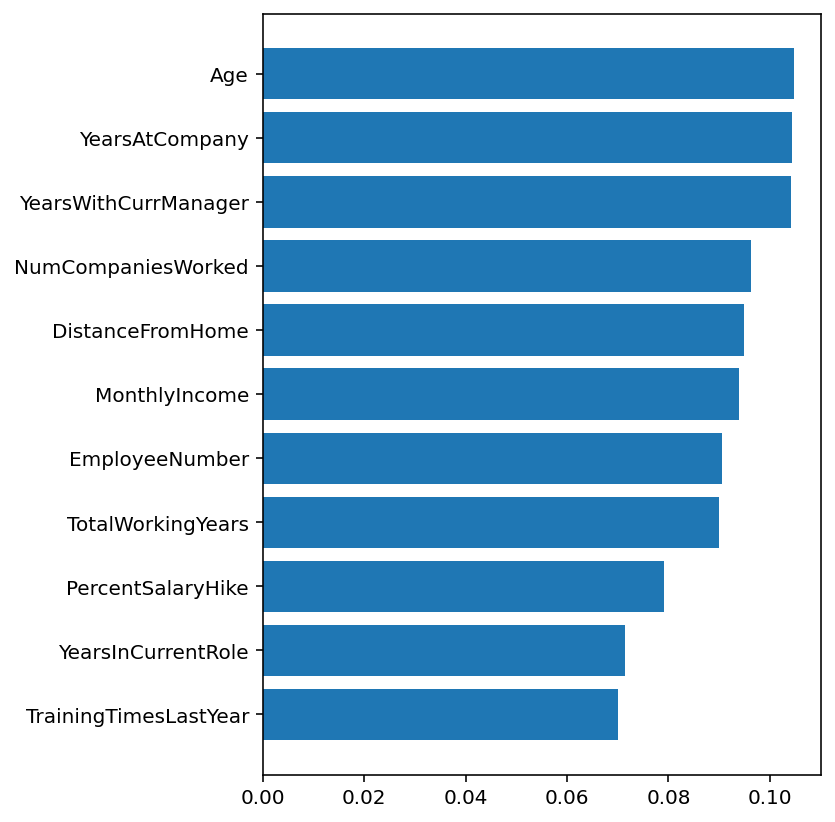

In [295]:
# 중요도 시각화
plt.figure(figsize=(5, 7))
plt.barh(im['feature'], im['score'])
plt.show()

- 오버 샘플링 후 각 변수의 중요도가 훨씬 증가한 것을 볼 수 있다.
- 나이, 현 직장 근무 연수, 현재까지 근무한 회사 수 순으로 중요도가 높다.
- 특히나 현 직장 근무 연수가 오버 샘플링 전후로 중요도가 많이 차이나는 것을 볼 수 있다.
- -> 1의 샘플 수가 증가했기 때문일 것이다.(이변량 시각화 결과 근무연수와 이직에는 관련이 있어보임)

## 7.4.XGBoost

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022를 지정합니다.

In [296]:
# 1단계: 불러오기
from xgboost import XGBClassifier

In [297]:
# 2단계: 선언하기
model = XGBClassifier(random_state=2022)

In [298]:
# 3단계: 학습하기
model.fit(x_train, y_train)

[10:27:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2022,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [299]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [300]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[278  27]
 [ 45 280]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       305
           1       0.91      0.86      0.89       325

    accuracy                           0.89       630
   macro avg       0.89      0.89      0.89       630
weighted avg       0.89      0.89      0.89       630



### 7.4.2.성능 정보 수집

- 아래 구문을 수행하여 이후 비교할 성능 정보를 저장합니다.

In [301]:
score['XGBoost_2'] = [precision_score(y_test, y_pred),
                      recall_score(y_test, y_pred),
                      accuracy_score(y_test, y_pred)]

### 7.4.3. Feature 중요도 시각화

In [302]:
# 중요도 확인
im = pd.DataFrame()
im['feature'] = list(x)
im['score'] = model.feature_importances_
im.sort_values(by='score', ascending=True, inplace=True)
im

,feature,score
3,MonthlyIncome,0.047055
2,EmployeeNumber,0.049707
5,PercentSalaryHike,0.053680
0,Age,0.063083
9,YearsInCurrentRole,0.071481
1,DistanceFromHome,0.079147
6,TotalWorkingYears,0.079888
4,NumCompaniesWorked,0.103190
7,TrainingTimesLastYear,0.132625
8,YearsAtCompany,0.155215


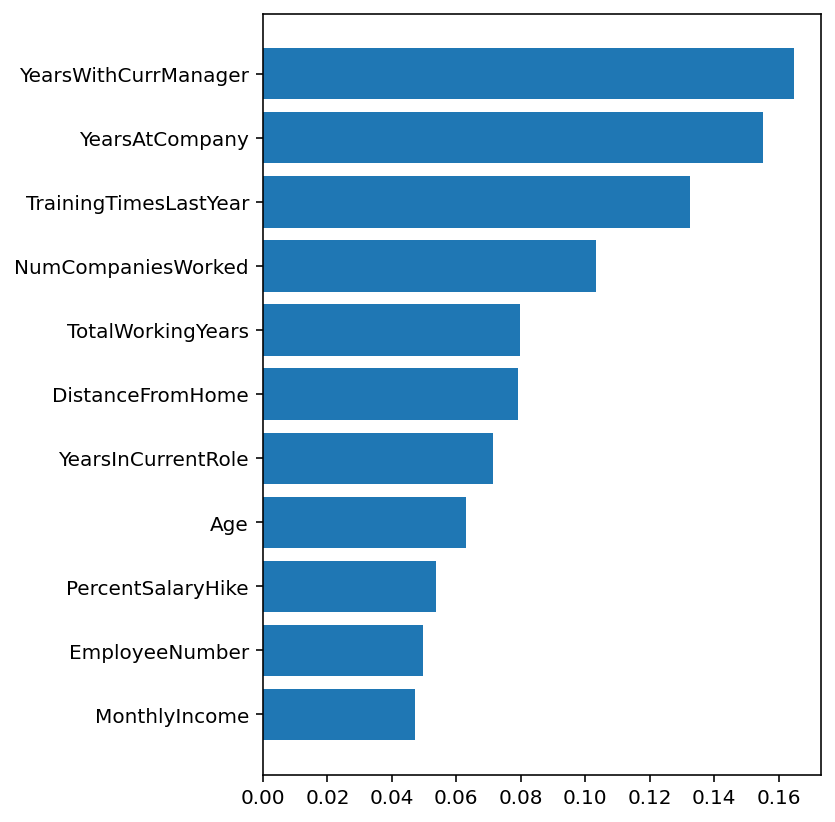

In [303]:
# 중요도 시각화
plt.figure(figsize=(5, 7))
plt.barh(im['feature'], im['score'])
plt.show()

- 오버 샘플링 전 XGBoost는 총 근무연수만 중요도가 가장 높고 나머지 feature들은 비슷한 중요도를 가졌는데
- 오버 샘플링 후 현 팀장과 근무한 연수가 가장 높은 중요도를 차지한 것을 볼 수 있다.

## 7.5. Decision Tree

In [304]:
# 1단계: 불러오기
from sklearn.tree import DecisionTreeClassifier

In [305]:
# 2단계: 선언하기
model = DecisionTreeClassifier(random_state=2022)

In [306]:
# 3단계: 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [307]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [308]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[223  82]
 [ 62 263]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.76       305
           1       0.76      0.81      0.79       325

    accuracy                           0.77       630
   macro avg       0.77      0.77      0.77       630
weighted avg       0.77      0.77      0.77       630



### 7.5.2.성능 정보 수집

In [309]:
score['Decision Tree_2'] = [precision_score(y_test, y_pred),
                      recall_score(y_test, y_pred),
                      accuracy_score(y_test, y_pred)]

### 7.5.3. Decision Tree 시각화

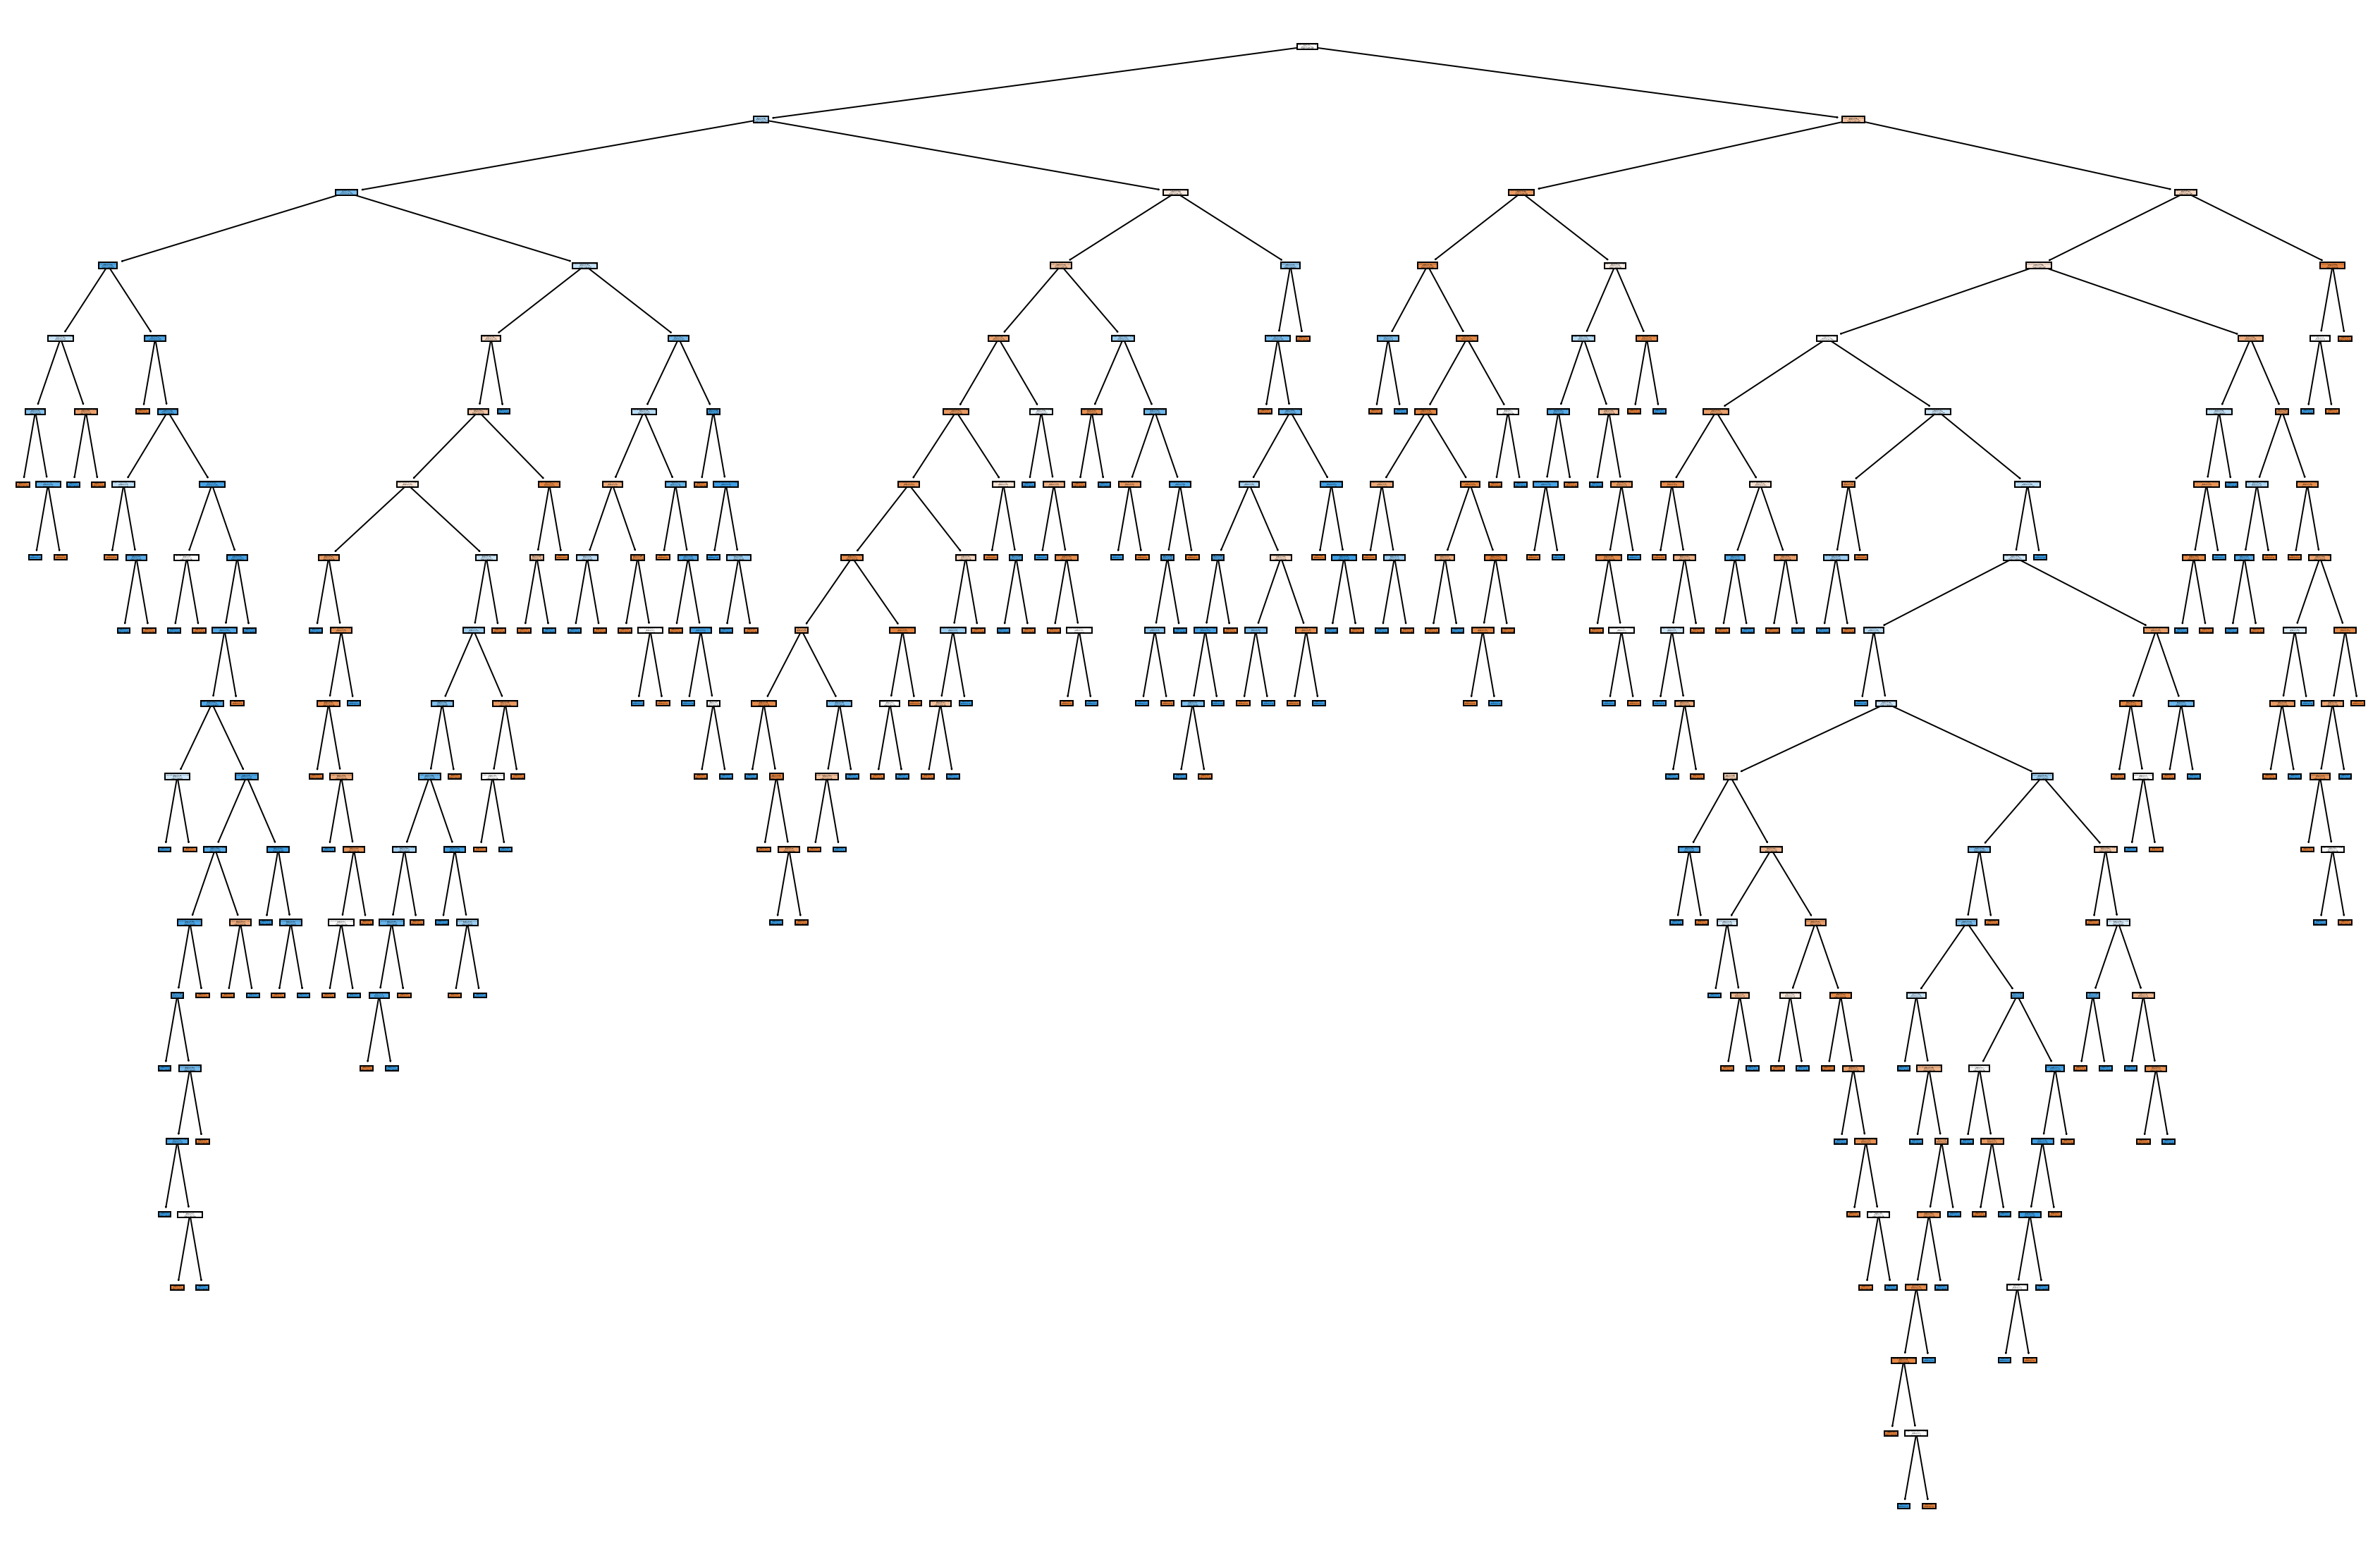

In [310]:
# 시각화 모듈 불러오기
from sklearn import tree

fig = plt.figure(figsize=(30, 20))
mytree = tree.plot_tree(model,
                        feature_names=x.columns,  
                        class_names=['Turnover', 'residual'], 
                        filled=True)

### 7.5.4 Feature 중요도 시각화

In [311]:
# 중요도 확인
im = pd.DataFrame()
im['feature'] = list(x)
im['score'] = model.feature_importances_
im.sort_values(by='score', ascending=True, inplace=True)
im

,feature,score
6,TotalWorkingYears,0.031057
10,YearsWithCurrManager,0.036498
9,YearsInCurrentRole,0.057885
7,TrainingTimesLastYear,0.059497
5,PercentSalaryHike,0.062665
3,MonthlyIncome,0.079421
2,EmployeeNumber,0.085539
0,Age,0.098220
4,NumCompaniesWorked,0.122123
1,DistanceFromHome,0.134413


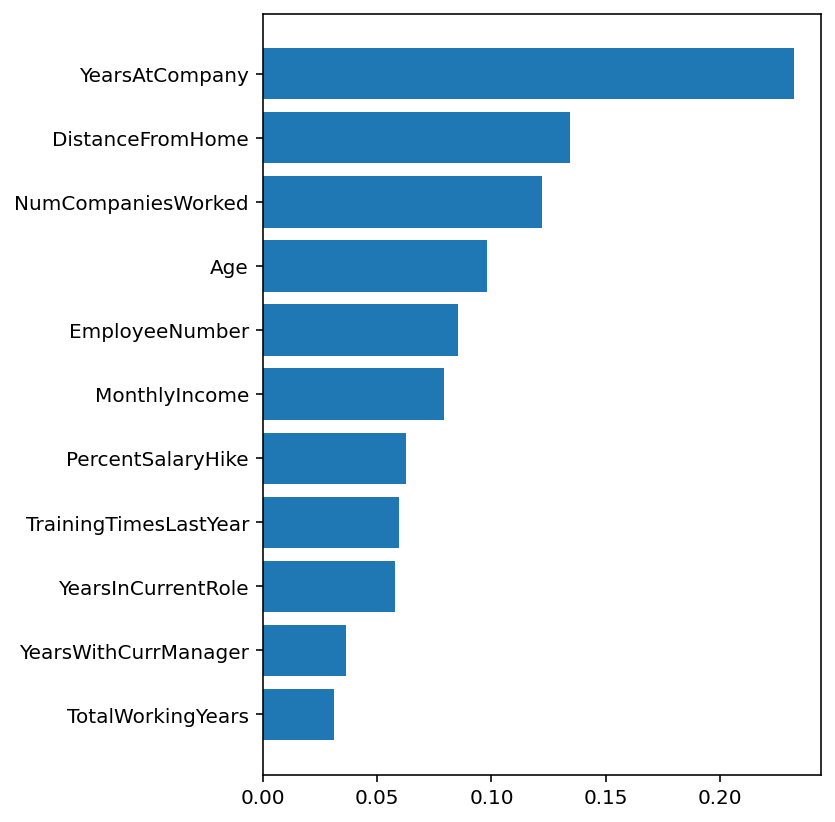

In [312]:
# 중요도 시각화
plt.figure(figsize=(5, 7))
plt.barh(im['feature'], im['score'])
plt.show()

# 8.정리 #2

## 8.1.성능 비교

- Over Sampling 전후 성능을 비교합니다.

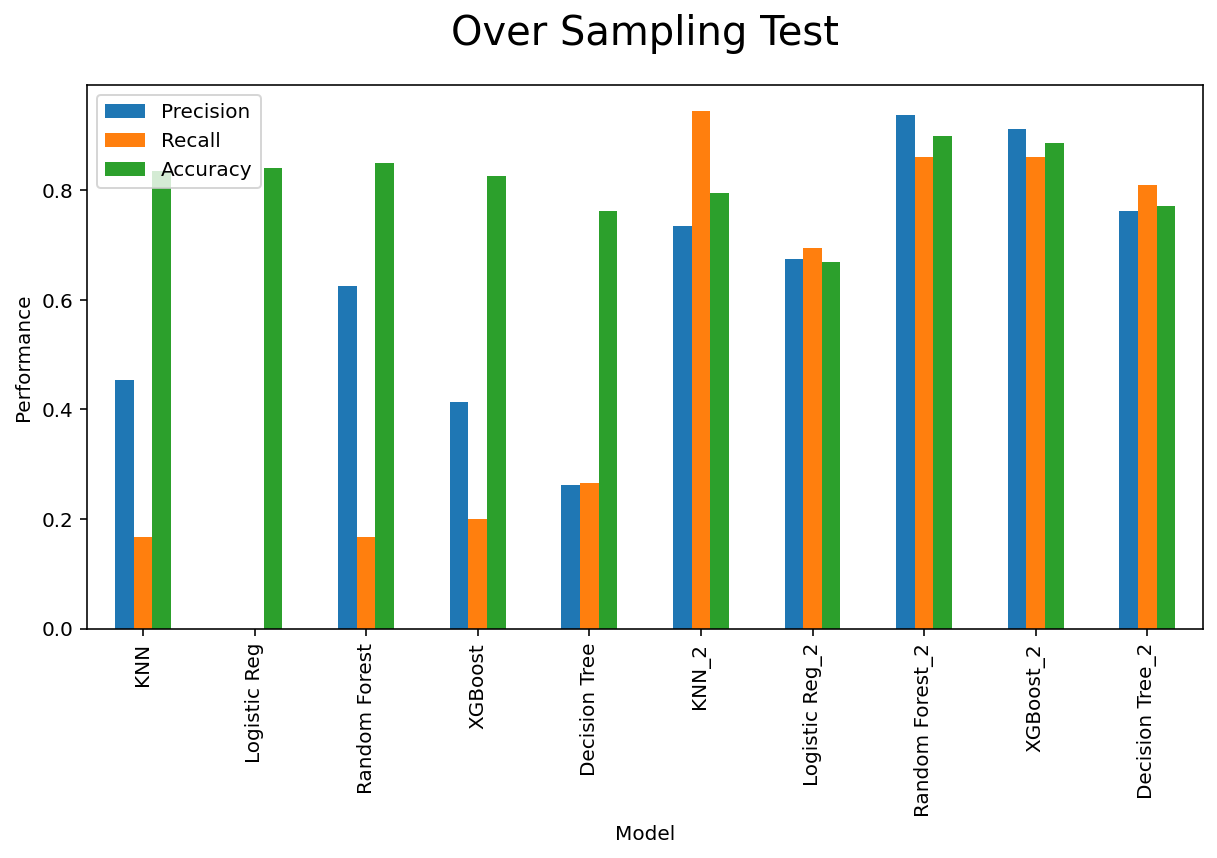

In [313]:
# 성능 비교
tmp = pd.DataFrame.from_dict(score, orient='index', columns=['Precision', 'Recall', 'Accuracy'])
tmp.plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title('Over Sampling Test', size=20, pad=20)
plt.xlabel('Model')
plt.ylabel('Performance')
plt.show()

In [315]:
# 모델의 성능 수치 확인
tmp

,Precision,Recall,Accuracy
KNN,0.454545,0.166667,0.834667
Logistic Reg,0.000000,0.000000,0.840000
Random Forest,0.625000,0.166667,0.850667
XGBoost,0.413793,0.200000,0.826667
Decision Tree,0.262295,0.266667,0.762667
KNN_2,0.734450,0.944615,0.795238
Logistic Reg_2,0.674627,0.695385,0.669841
Random Forest_2,0.936455,0.861538,0.898413
XGBoost_2,0.912052,0.861538,0.885714
Decision Tree_2,0.762319,0.809231,0.771429


## 8.2.정리

- 불균형 데이터에 대해 이해 했나요?
- Over Sampling, Under Sampling 개념을 이해 했나요?
- Over Sampling 또는 Under Sampling 수행 후 모델의 성능이 달라졌나요?
- 모델의 성능을 높이기 위해 어떤 것들을 할 수 있을까요?

- 오버 샘플링 수행 전 최저였던 recall 성능이 0이었는데, 수행 후 최고 recall 성능이 0.94까지 나타났다.
- -> 샘플링 불균형의 차이가 이렇게 극단적으로 결과가 달라지는 것을 느꼈다.
- 더 높은 성능을 내기 위해서 Recall이 가장 높았던 KNN 모델과 accuracy가 가장 높았던 Random Forest모델을 튜닝을 해본다.

# 9.튜닝

## 9.1 KNN

- GridSearch

In [373]:
# 불러오기
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [374]:
# 파라미터 범위 지정
param = {'n_neighbors':range(1, 11)
         }

In [375]:
# 튜닝
model_knn = KNeighborsClassifier()
model = GridSearchCV(model_knn,
                           param, 
                           cv = 10,
                           n_jobs=-1)

In [376]:
# 학습하기
model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 11)})

In [377]:
# 확인하기
print('최적의 파라미터 :', model.best_params_)
print('최고 성능 :', model.best_score_) 

최적의 파라미터 : {'n_neighbors': 2}
최고 성능 : 0.8571428571428571


In [378]:
# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[245  60]
 [ 19 306]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       305
           1       0.84      0.94      0.89       325

    accuracy                           0.87       630
   macro avg       0.88      0.87      0.87       630
weighted avg       0.88      0.87      0.87       630



In [365]:
# 성능 정보 수집
from sklearn.metrics import accuracy_score

score={}
score['KNN_Grid'] = accuracy_score(y_test, y_pred)

## 9.2 RandomForest

- RandomSearch

In [366]:
# 파라미터 범위 지정
param = {'max_depth':range(1, 51),
         'min_samples_leaf':range(1, 11),
         'min_samples_split':range(2, 11),
         'n_estimators':range(10, 211, 10)}

In [367]:
# 튜닝
model_rt = RandomForestClassifier(random_state=2022)
model = RandomizedSearchCV(model_rt,
                           param, 
                           cv = 10,
                           n_iter=30,
                           n_jobs=-1)

In [368]:
# 학습하기
model.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=2022),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': range(1, 51),
                                        'min_samples_leaf': range(1, 11),
                                        'min_samples_split': range(2, 11),
                                        'n_estimators': range(10, 211, 10)})

In [369]:
# 확인하기
print('최적의 파라미터 :', model.best_params_)
print('최고 성능 :', model.best_score_) 

최적의 파라미터 : {'n_estimators': 40, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 38}
최고 성능 : 0.8972789115646259


In [370]:
# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[282  23]
 [ 44 281]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       305
           1       0.92      0.86      0.89       325

    accuracy                           0.89       630
   macro avg       0.89      0.89      0.89       630
weighted avg       0.90      0.89      0.89       630



In [371]:
# 성능 정보 수집
score['RandomForest_Random'] = accuracy_score(y_test, y_pred)

-KNN_Grid: 0.8905
-RandomForest_Random: 0.8937


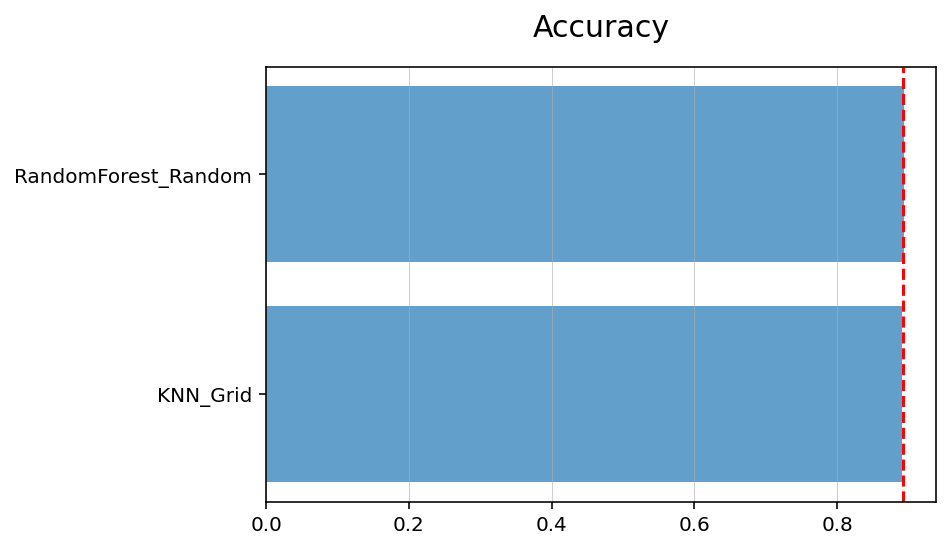

In [372]:
# 성능 정보
for k, v in score.items():
    print(f'-{k}: {v:.4f}')

# 시작화
plt.barh(list(score.keys()), score.values(), alpha=0.7)
plt.title('Accuracy', size=15, pad=15)
plt.grid(axis='x', linewidth=0.3)
plt.axvline(sum(score.values())/len(score), color='r', linestyle='--') # 평균선 추가 
plt.show()

# 결론

- 이직율을 낮추기 위해서는 자기가 실제 근무하고 있는 현 직장 근무연수와 현 팀장 근무연수에 초점을 맞추고 특정 근무연수와 팀장과의 근무연수에 해당하는 직원에 대해 집중 관리하여 이탈율을 낮춘다. 
- → 상담, 높은 연봉협상 제시 등

- 오버 샘플링 수행 전 최저였던 recall 성능이 0이었는데, 수행 후 최고 recall 성능이 0.94까지 나타났다.
- -> 샘플링 불균형의 차이가 이렇게 극단적으로 결과가 달라지는 것을 느낌

- 하지만, 이번 데이터는 test 데이터까지 건들여서 평가에도 영향을 미쳤기 때문에 성능이 좋은 것으로 보임(→ 정확한 성능을 얻고 싶으면 train데이터 셋만 오버 셈플링 진행)